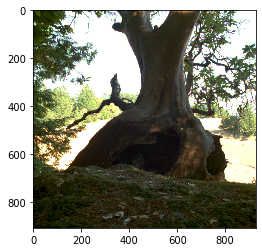

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt as eks
import ImageView as imv
%matplotlib inline

def Inpainting_rgb(im, mask):
    #gray_im =np.sum(im.astype(float), 2) / (3 * 255)  #gråtone trengs for å vise masken
    im0 = np.copy(im)
    im[im < 0] = 0                # klipp til lovlige verdier
    im[im > 1] = 1
    for i in range(25):
        im=eks.eksplisitt(im, n=1)  #løs
        im[np.logical_not(mask)] = im0[np.logical_not(mask)]         #ja
    return im


def getMosaic(im):
    #lag mosaic
    mosaic = np.zeros(im.shape[:2]) # Alloker plass
    mosaic[ ::2, ::2] = im[ ::2, ::2, 0] # R
    mosaic[1::2, ::2] = im[1::2, ::2, 1] # G
    mosaic[ ::2, 1::2] = im[ ::2, 1::2, 1] # G
    mosaic[1::2, 1::2] = im[1::2, 1::2, 2] # B
    return mosaic

def mosaicToRgb(im,mosaic):
    #fyller inn i fargekanalene fra mosaic
    im_ed= np.zeros(im.shape)
    im_ed[ ::2, ::2, 0]=mosaic[ ::2, ::2]  #R
    im_ed[1::2, ::2, 1]=mosaic[1::2, ::2]  #G
    im_ed[ ::2, 1::2, 1]=mosaic[ ::2, 1::2]#G
    im_ed[1::2, 1::2, 2]=mosaic[1::2, 1::2]#B

    #lager maske for alle fargekanalene
    mask = np.ones(im_ed.shape)
    mask[ ::2, ::2, 0]=0  #R
    mask[1::2, ::2, 1]=0  #G
    mask[ ::2, 1::2, 1]=0 #G
    mask[1::2, 1::2, 2]=0 #B
    mask=mask.astype(bool)#gjør om til bool-array
    
    #inpainter hver av fargekanalene
    Inpainting_rgb(im_ed[:,:,0], mask[:,:,0])
    Inpainting_rgb(im_ed[:,:,1], mask[:,:,1])
    Inpainting_rgb(im_ed[:,:,2], mask[:,:,2])
    
    return im_ed

file='../hdr-bilder/Tree/Tree_00032.png'
im=imageio.imread(file)
im = im.astype(float) / 255

mosaic=getMosaic(im)
im_show=mosaicToRgb(im, mosaic)

plt.imshow(im_show)